In [1]:
from lens3D import lens
from lights3D import lights
from tracelight3D import trace
import numpy as np
from pprint import pprint

In [11]:
a = lens((100,100))
a.sample_convex_lens()
a.build_surface()
a.normalize_surface()
pprint(a.upper_surface.shape)

array([ 0.       ,  0.       ,  1.       , -0.       ,  0.8944272,
       -0.4472136,  0.       , -0.       ,  0.       ,  1.       ,
        0.       , -0.       , -0.8944272, -0.4472136,  0.       ,
        0.8944272], dtype=float32)


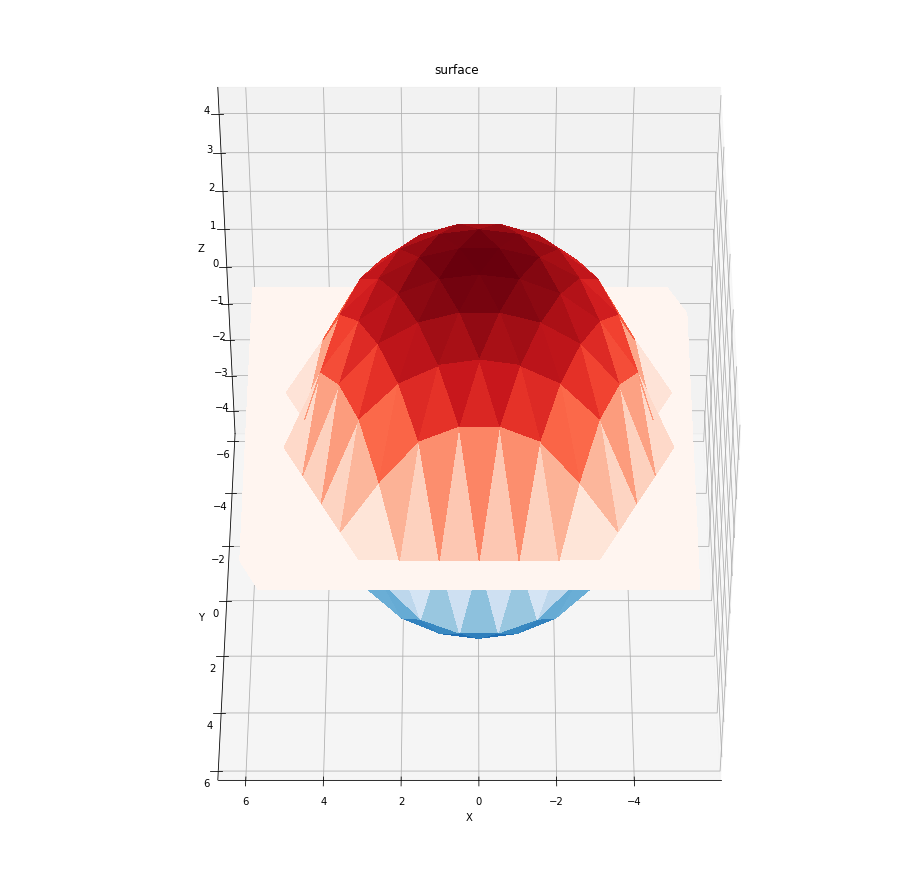

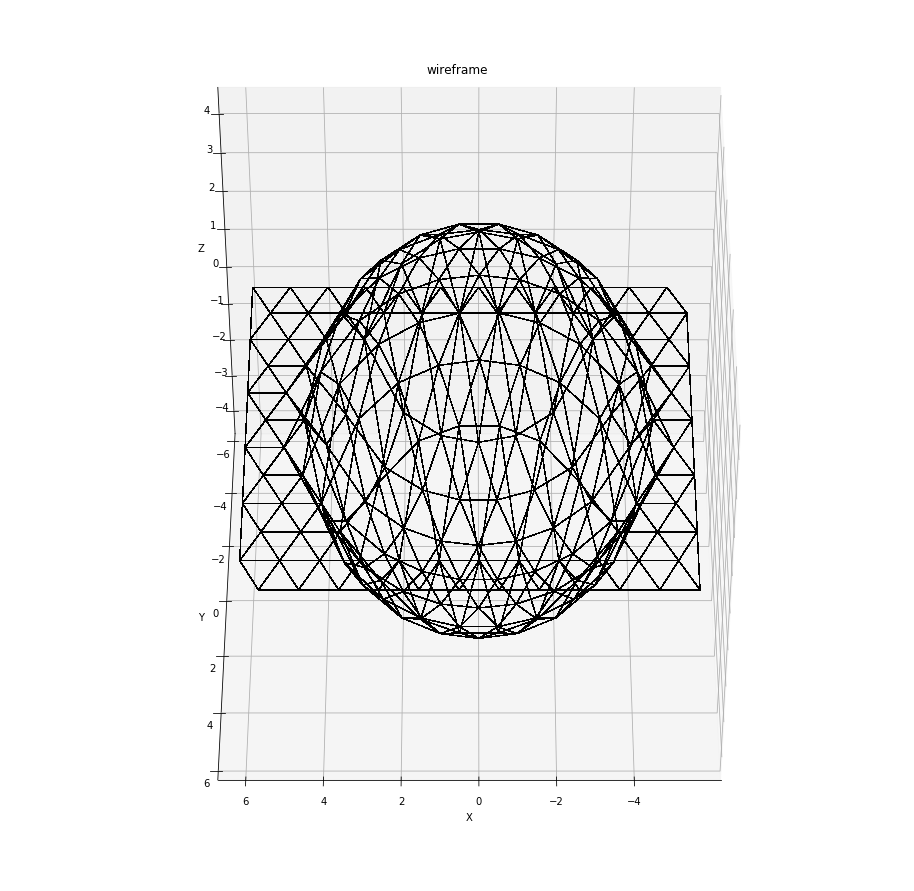

In [3]:
a = lens((10,10))
a.sample_convex_lens()
a.build_surface()
#a.draw_triangle_boundary(a.lower_surface)
#a.draw_triangle_boundary(a.upper_surface)
a.show_lens('surface',90,45)
a.show_lens('wireframe',90,45)

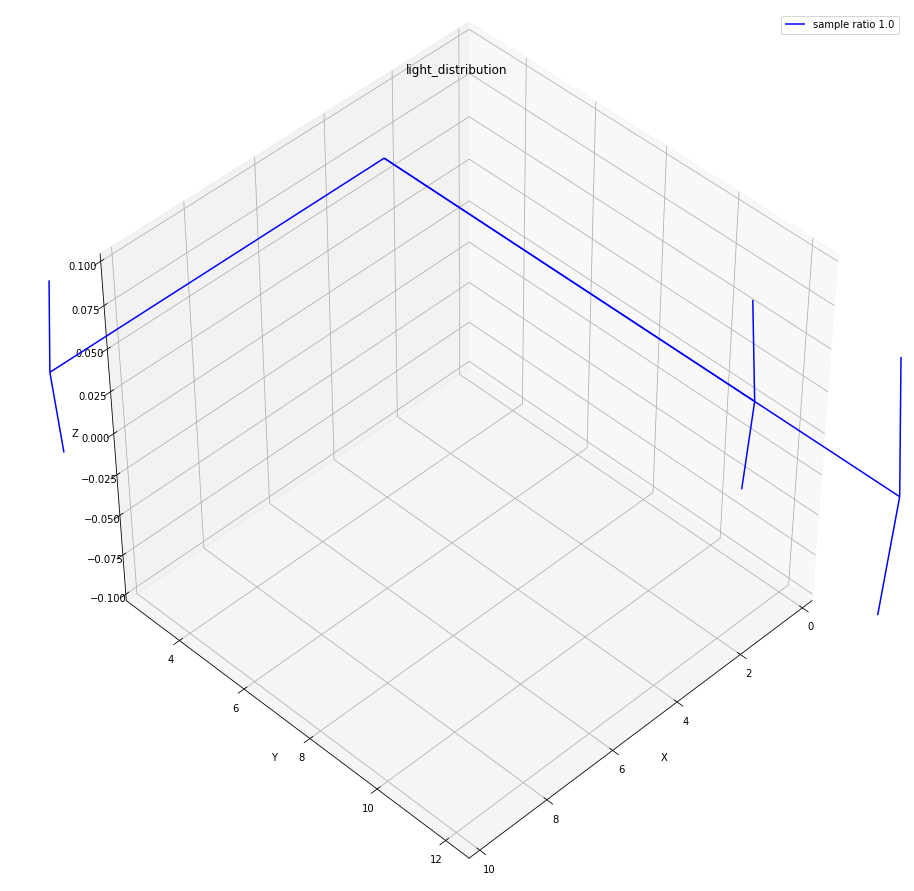

In [4]:
b=lights(np.array([[0.484, 100, 0,0,0, 10,0,0], [0.485, 50, 0,0,0, 0,15,0], [0.485, 50, 0,0,0, 0,11,0]]))
#b.normalize_beam()
b.light_distribution(1.0)

In [3]:
a = lens((4,4))
a.sample_convex_lens()
a.build_surface()
a.normalize_surface()
#pprint(a.upper_surface)
#pprint(a.lower_surface)
#print(a.upper_surface.shape, a.lower_surface.shape)
#print(a.get_surfaces().shape)
b=lights(np.array([[0.484, 100, 2,1.5,-0.01, 0,0,1.0], [0.485, 100, 2,1.5,-0.01, 0,1.0,1.0], [0.486, 100, 2,1.5,-0.01, 1.0,1.0,1.0]]))
b.normalize_beam()
in_len_beams, out_len_beams = trace().GPU_reflect_refract(a.get_surfaces(), b.beams, 1.0, 1.48, 2)
hits = trace().uniformity(np.array([0,0,-1,10]), out_len_beams, 0, 0)

------------------
[[ 4.8400000e-01  3.7950783e+00  2.0000007e+00  1.4999998e+00
   1.1428845e+00  6.9910920e-01 -1.9539453e-01 -6.8779898e-01]
 [ 4.8400000e-01  9.6204918e+01  1.9999999e+00  1.5000000e+00
   1.1428862e+00 -1.3051824e-01  3.6478639e-02  9.9077463e-01]
 [ 4.8500001e-01  1.0000000e+02  2.0000000e+00  1.5000000e+00
  -9.9999998e-03  0.0000000e+00  7.0710677e-01  7.0710677e-01]
 [ 0.0000000e+00  0.0000000e+00  0.0000000e+00  0.0000000e+00
   0.0000000e+00  0.0000000e+00  0.0000000e+00  0.0000000e+00]
 [ 4.8600000e-01  1.0000000e+02  2.0000000e+00  1.5000000e+00
  -9.9999998e-03  5.7735026e-01  5.7735026e-01  5.7735026e-01]
 [ 0.0000000e+00  0.0000000e+00  0.0000000e+00  0.0000000e+00
   0.0000000e+00  0.0000000e+00  0.0000000e+00  0.0000000e+00]]
##
[[ 4.8400000e-01  3.7950783e+00  2.0000007e+00  1.4999998e+00
   1.1428845e+00  6.9910920e-01 -1.9539453e-01 -6.8779898e-01]
 [ 4.8400000e-01  9.6204918e+01  1.9999999e+00  1.5000000e+00
   1.1428862e+00 -1.3051824e-01  3.64786

In [18]:
a.get_surfaces().shape

(34, 16)

In [4]:
in_len_beams

array([[  0.484     ,   3.7551053 ,   1.9970243 ,   1.5008316 ,
          1.2671336 ,  -0.91306764,   0.25519395,  -0.8800161 ],
       [  0.484     ,  92.498795  ,   1.9970248 ,   1.5008315 ,
          1.2671354 ,  -0.41754267,   0.11669931,   0.9519628 ],
       [  0.486     , 100.        ,   2.5046792 ,   2.0397315 ,
          0.61777633,  -1.9138644 ,  -0.66825706,   0.9673432 ]],
      dtype=float32)

In [6]:
a = lens((10,10))
a.sample_convex_lens()
a.build_surface()
a.normalize_surface()

surfaces = np.concatenate((a.upper_surface[0], a.lower_surface[0]), axis=0)
b=lights(np.array([[0.484, 100, 2,1.5,-0.1, 0,0,1.0], [0.485, 100, 2,1.5,-0.1, 0,1.0,1.0], [0.485, 100, 2,1.5,-0.1, 1.0,1.0,1.0]]))
b.normalize_beam()
#b.light_distribution(1.0,90,0)
#pprint(b.beams)
GPU_reflect_refract(surfaces, b.beams, 1.0, 1.33)

(array([[  0.484     , 100.        ,   2.        ,   1.5       ,
          -0.1       ,   0.        ,   0.        ,   1.        ],
        [  0.485     , 100.        ,   2.        ,   1.5       ,
          -0.1       ,   0.        ,   0.70710677,   0.70710677]],
       dtype=float32), array([], dtype=float64))